In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aryantiwari0","key":"265ae85d25947bbf0f383c88a345b04b"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [ ]:
!unzip /content/train.zip


Archive:  /content/train.zip
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: trai

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model


base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy() , metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
import os
if os.path.exists('/content/train'):
  print("Directory exists")
else:
  print("Directory does not exist")

Directory exists


In [ ]:
import os
os.makedirs('/content/train', exist_ok=True)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                              )

Found 350 images belonging to 7 classes.


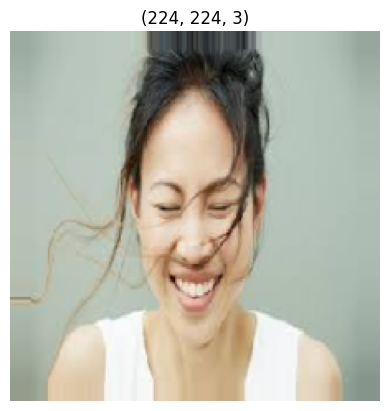

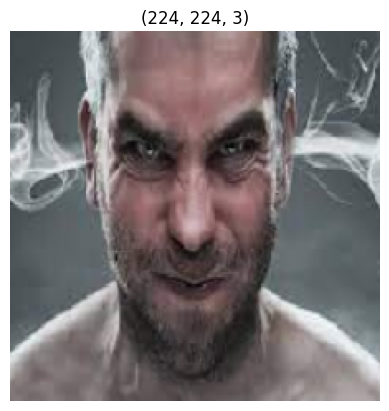

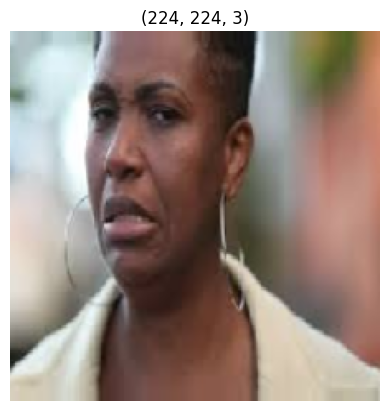

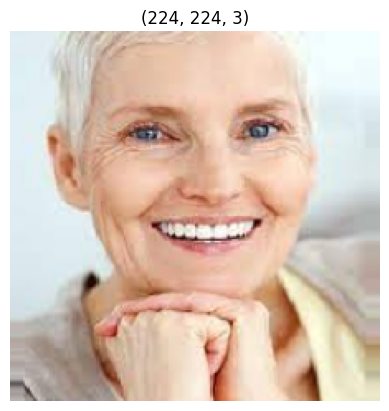

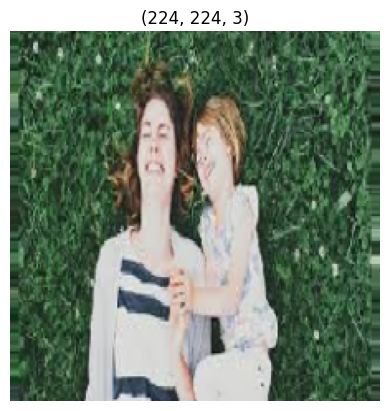

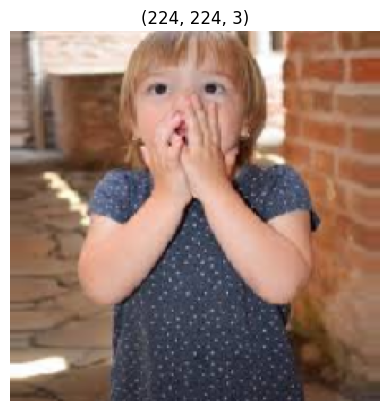

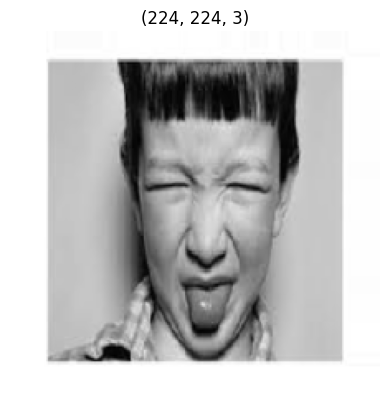

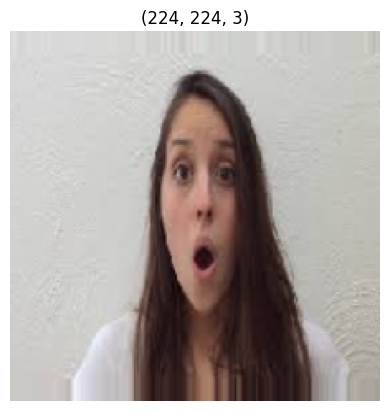

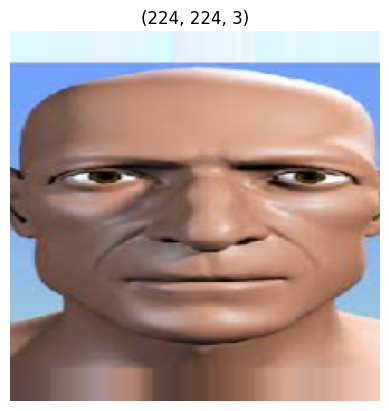

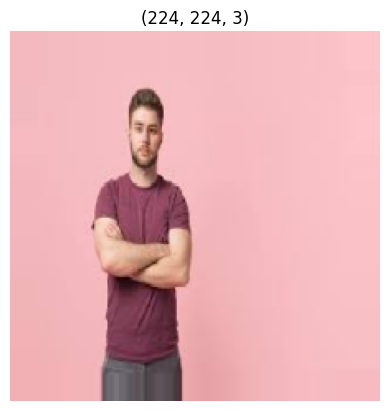

In [ ]:

#
import matplotlib.pyplot as plt

t_img , label = next(train_data)

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

mc = ModelCheckpoint(filepath="model.save.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [ ]:
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1689 - loss: 8.6503
Epoch 1: val_accuracy improved from -inf to 0.58594, saving model to model.save.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.1727 - loss: 8.6868 - val_accuracy: 0.5859 - val_loss: 2.9874
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3750 - loss: 4.8602

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.58594 to 0.65957, saving model to model.save.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 611ms/step - accuracy: 0.3750 - loss: 4.8602 - val_accuracy: 0.6596 - val_loss: 2.9896
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6217 - loss: 2.9964
Epoch 3: val_accuracy improved from 0.65957 to 0.80859, saving model to model.save.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.6227 - loss: 2.9803 - val_accuracy: 0.8086 - val_loss: 1.1823
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8125 - loss: 0.8881
Epoch 4: val_accuracy did not improve from 0.80859
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.8125 - loss: 0.8881 - val_accuracy: 0.7766 - val_loss: 1.3920
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7682 - loss: 1.3937
Epoch 5: val_accuracy improved from 0.80859 to 0.83984, saving model to model.save.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.7689 - loss: 1.3816 - val_acc

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/model.save.keras")

In [ ]:
from google.colab import files

files.download('/content/model.save.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>